In [64]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

t, r, k, a1, a2, m12, m21,  = symbols("t, r, k, a1, a2, m12, m21")
x = Function("x")
y = Function("y")

#Differential Equation 01, including:
# r = positive growth rate
# k1, k2 = Carrying Capacity of Patch 1 and Patch 2 respectively 
# a1 = percentage decrease due to human induced Allee Effects in patch 1
# a2 = percentage decrease due to environmental Allee Effects in patch 2
# m12, m21 = Migration from Patch 1 to 2 and 2 to 1 respectively

Patch_1 = Eq(diff(x(t), t), r * ((x(t)/a1) - 1) * ((1 - (x(t)/k)) * x(t)) - (m12 * x(t)) + (m21 * y(t)))

Patch_2 = Eq(diff(y(t), t), r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) - (m12 * x(t)) + (m21 * y(t)))


solution= dsolve([Patch_1, Patch_2], [x(t), y(t)])
display(solution)



[Eq(x(t), Piecewise((C1*Piecewise((-m12/2 - m21/2 + sqrt(-4*m12*m21 + (-m12 - m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 - m21/2 + r - sqrt(-4*m12*m21 + (-m12 - m21)**2)/2)), (m21, True))*exp(t*(-m12/2 + m21/2 - r + sqrt(-4*m12*m21 + (-m12 - m21)**2)/2)) + C2*Piecewise((-m12/2 - m21/2 - sqrt(-4*m12*m21 + (-m12 - m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 - m21/2 + r + sqrt(-4*m12*m21 + (-m12 - m21)**2)/2)), (m21, True))*exp(t*(-m12/2 + m21/2 - r - sqrt(-4*m12*m21 + (-m12 - m21)**2)/2)), Ne(m12**2 - 2*m12*m21 + m21**2, 0)), (C1*exp(t*(-m12/2 + m21/2 - r + sqrt(-4*m12*m21 + (-m12 - m21)**2)/2)), Eq(m12, 0) & Eq(m21, 0) & Eq(m12 + r, -m21 + r)), ((C1*Piecewise((-m12/2 - m21/2 + sqrt(-4*m12*m21 + (-m12 - m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 - m21/2 + r - sqrt(-4*m12*m21 + (-m12 - m21)**2)/2)), (m21, True)) + C2*(t*Piecewise((-m12/2 - m21/2 + sqrt(-4*m12*m21 + (-m12 - m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 - m21/2 + r - sqrt(-4*m12*m21 + (-m12 - m21)**2)/2)), (m21, True)) + Piecew

In [65]:
#Two Patch Coupled System of ODEs
DS1 = r * ((x(t)/a1) - 1) * ((1 - (x(t)/k)) * x(t)) - (m12 * x(t)) + (m21 * x(t))
DS2 = r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) - (m12 * y(t)) + (m21 * y(t))

#Finding the Equilibrium Values
Equilibrium= nonlinsolve([DS1,DS2], [x(t), y(t)])
display(Equilibrium)

eq_list = list(Equilibrium)

FiniteSet((0, 0), (0, a2/2 + k/2 - sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (0, a2/2 + k/2 + sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (a1/2 + k/2 - sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), 0), (a1/2 + k/2 + sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), 0), (a1/2 + k/2 - sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), a2/2 + k/2 - sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (a1/2 + k/2 - sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), a2/2 + k/2 + sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (a1/2 + k/2 + sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), a2/2 + k/2 - sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (a1/2 + k/2 + sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), a2/2 + k/2 + sqrt(r*(a2**2*r - 

In [55]:
Eq1 = eq_list[0]
print(Eq1)



(0, 0)


'''
#Example case for equilibrium values with "random" parameters
k=1
r=1
a1=10
a2=10
m12=0.6
m21=0.02

DS_1 = r * ((x(t)/a1) - 1) * ((1 - (x(t)/k)) * x(t)) - (m12 * x(t)) + (m21 * x(t))
DS_2 = r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) - (m12 * y(t)) + (m21 * y(t))


Equilibrium= nonlinsolve([DS_1,DS_2], [x(t), y(t)])

Equilibrium_Values=list(Equilibrium)
#print(Equilibrium_Values)
#type(Equilibrium_Values)

x_val = (list(zip(*Equilibrium_Values))[0])
y_val = (list(zip(*Equilibrium_Values))[1])

scatter(x_val, y_val)



In [58]:
#Finding the Jacobian 
Jacobian = Matrix(
    [
    [diff(DS1, x(t)), diff(DS1, y(t))], 
    [diff(DS2, x(t)), diff(DS2, y(t))]
    ])
Jacobian


Matrix([
[-m12 + m21 + r*(-1 + x(t)/a1)*(1 - x(t)/k) - r*(-1 + x(t)/a1)*x(t)/k + r*(1 - x(t)/k)*x(t)/a1,                                                                                             0],
[                                                                                            0, -m12 + m21 + r*(-1 + y(t)/a2)*(1 - y(t)/k) - r*(-1 + y(t)/a2)*y(t)/k + r*(1 - y(t)/k)*y(t)/a2]])

In [59]:
#Jacobian matrix with (0,0) substituted in
Jac_1 = simplify(Jacobian.subs({x(t) : eq_list[0][0], y(t) : eq_list[0][1]}))
Jac_1

Matrix([
[-m12 + m21 - r,              0],
[             0, -m12 + m21 - r]])

In [60]:
#Caculating the Jacobian for each of the equilibrium values. 
for i in eq_list: 
    Jac = simplify(Jacobian.subs({x(t) : i[0], y(t) : i[1]}))
    display(Jac)
    

Matrix([
[-m12 + m21 - r,              0],
[             0, -m12 + m21 - r]])

Matrix([
[-m12 + m21 - r,                                                                                                                                                                                                          0],
[             0, (-a2**2*r + 4*a2*k*m12 - 4*a2*k*m21 + 2*a2*k*r + a2*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)) - k**2*r + k*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)))/(2*a2*k)]])

Matrix([
[-m12 + m21 - r,                                                                                                                                                                                                          0],
[             0, -(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + a2*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)) + k**2*r + k*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)))/(2*a2*k)]])

Matrix([
[(-a1**2*r + 4*a1*k*m12 - 4*a1*k*m21 + 2*a1*k*r + a1*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)) - k**2*r + k*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)))/(2*a1*k),              0],
[                                                                                                                                                                                                         0, -m12 + m21 - r]])

Matrix([
[-(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + a1*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)) + k**2*r + k*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)))/(2*a1*k),              0],
[                                                                                                                                                                                                         0, -m12 + m21 - r]])

Matrix([
[(-a1**2*r + 4*a1*k*m12 - 4*a1*k*m21 + 2*a1*k*r + a1*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)) - k**2*r + k*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)))/(2*a1*k),                                                                                                                                                                                                          0],
[                                                                                                                                                                                                         0, (-a2**2*r + 4*a2*k*m12 - 4*a2*k*m21 + 2*a2*k*r + a2*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)) - k**2*r + k*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)))/(2*a2*k)]])

Matrix([
[(-a1**2*r + 4*a1*k*m12 - 4*a1*k*m21 + 2*a1*k*r + a1*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)) - k**2*r + k*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)))/(2*a1*k),                                                                                                                                                                                                          0],
[                                                                                                                                                                                                         0, -(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + a2*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)) + k**2*r + k*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)))/(2*a2*k)]])

Matrix([
[-(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + a1*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)) + k**2*r + k*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)))/(2*a1*k),                                                                                                                                                                                                          0],
[                                                                                                                                                                                                         0, (-a2**2*r + 4*a2*k*m12 - 4*a2*k*m21 + 2*a2*k*r + a2*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)) - k**2*r + k*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)))/(2*a2*k)]])

Matrix([
[-(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + a1*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)) + k**2*r + k*sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r)))/(2*a1*k),                                                                                                                                                                                                          0],
[                                                                                                                                                                                                         0, -(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + a2*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)) + k**2*r + k*sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r)))/(2*a2*k)]])

-m12*x(t) + m21*x(t) + r*(-1 + x(t)/a1)*(1 - x(t)/k)*x(t)
-m12*y(t) + m21*y(t) + r*(-1 + y(t)/a2)*(1 - y(t)/k2)*y(t)


TypeError: can't convert expression to float

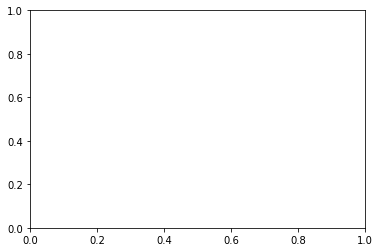

In [70]:
#Finding and plotting nullclines (or trying to!)
null_1 = r * ((x(t)/a1) - 1) * ((1 - (x(t)/k1)) * x(t)) - (m12 * x(t)) + (m21 * x(t))
null_2 = r * ((y(t)/a2) - 1) * (1 - (y(t)/k2)) * y(t) - (m12 * y(t)) + (m21 * y(t))

solve(null_1)
print(null_1)
solve(null_2)
print(null_2)

k=1
r=1
a1=1
a2=1
m12=1
m21=1
plt.plot(null_1,null_2)
